In [6]:
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib import pyplot as plt

# Let's load the data.

In [7]:
url = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter04/glass.csv'

In [9]:
df = pd.read_csv(url)

In [10]:
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
213  1.51645  14.94  0.00  1.87  73.11  0.00  8.67  1.38  0.0
214  1.51831  14.39  0.00  1.82  72.86  1.41  6.47  2.88  0.0
215  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.0
216  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
217  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0

[218 rows x 9 columns]

# Shuffle the rows to remove any possible order effects

In [11]:
dfs = sk.utils.shuffle(df)

# Standardize data with z-score

In [12]:
scaler = StandardScaler()

In [13]:
Xs = scaler.fit_transform(dfs)

# Create complete link matrix

In [14]:
complete_link_matrix =linkage(Xs, method='complete')

# Show dendrogram from linkage matrix

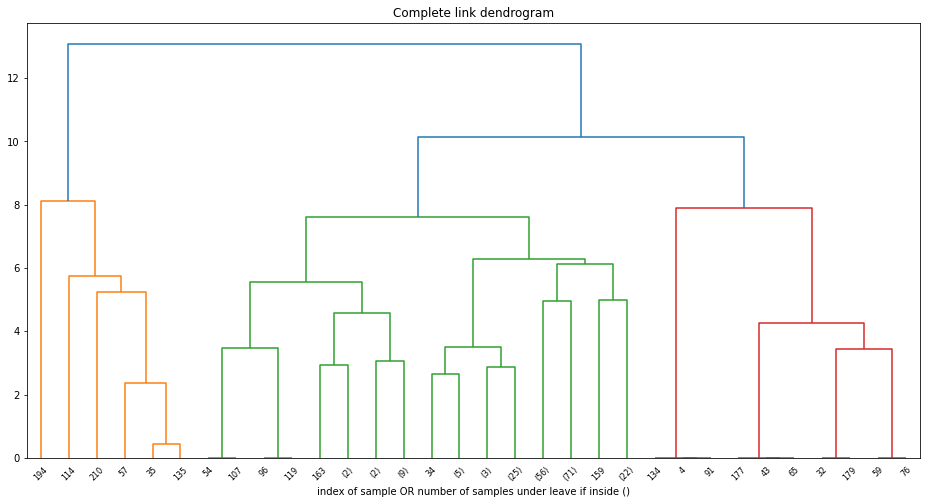

In [15]:
plt.figure(figsize=(16,8))

dendrogram(complete_link_matrix,
           truncate_mode="level",
           p=5)
#          p is the maximum number of splits the dendrogram will make 


plt.title("Complete link dendrogram")
plt.xlabel("index of sample OR number of samples under leave if inside ()")
plt.show()

# Let's get clusters from the linkage matrix

Text(0.5, 0, 'cluster')

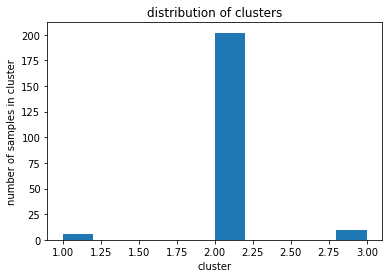

In [16]:
labels = fcluster(complete_link_matrix, t=9, criterion='distance')

plt.hist(labels)
plt.title('distribution of clusters')
plt.ylabel('number of samples in cluster')
plt.xlabel('cluster')

In [17]:
df['cluster'] = labels
dfs['cluster'] = labels

In [18]:
df[df['cluster'] == 1]

RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  cluster
35   1.51567  13.29  3.45  1.21  72.74  0.56  8.57  0.00  0.00        1
57   1.51824  12.87  3.48  1.29  72.95  0.60  8.43  0.00  0.00        1
114  1.51847  13.10  3.97  1.19  72.44  0.60  8.43  0.00  0.00        1
135  1.51789  13.19  3.90  1.30  72.33  0.55  8.44  0.00  0.28        1
194  1.51617  14.95  0.00  2.27  73.30  0.00  8.71  0.67  0.00        1
210  1.51658  14.80  0.00  1.99  73.11  0.00  8.28  1.71  0.00        1

In [19]:
dfs[dfs['cluster'] == 1]

RI     Na   Mg    Al     Si     K     Ca    Ba    Fe  cluster
111  1.52739  11.02  0.0  0.75  73.08  0.00  14.96  0.00  0.00        1
112  1.52777  12.64  0.0  0.67  72.02  0.06  14.40  0.00  0.00        1
107  1.53393  12.30  0.0  1.00  70.16  0.12  16.19  0.00  0.24        1
110  1.52664  11.23  0.0  0.77  73.21  0.00  14.68  0.00  0.00        1
106  1.53125  10.73  0.0  2.10  69.81  0.58  13.30  3.15  0.28        1
105  1.52475  11.45  0.0  1.88  72.19  0.81  13.24  0.00  0.34        1

In [20]:
X

NameError: name 'X' is not defined